https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset

In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [427]:
flight = pd.read_excel('Data_Train.xlsx')
flight.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [428]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [429]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [430]:
fm = flight['Route'].mode()
ft =flight['Total_Stops'].mode()

print(fm[0],ft[0])

DEL → BOM → COK 1 stop


In [431]:
flight['Route'].fillna(fm[0],inplace=True)
flight['Total_Stops'].fillna(ft[0],inplace=True)

In [432]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

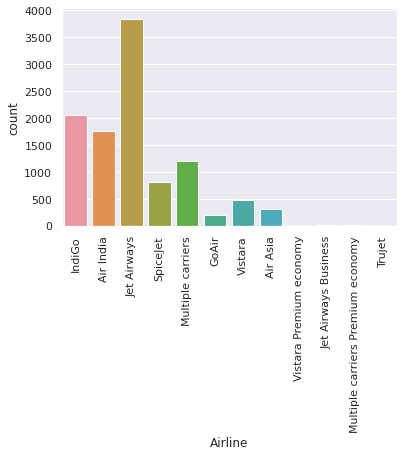

In [433]:
print(flight['Airline'].value_counts())
sns.countplot(flight['Airline'])
plt.xticks(rotation=90)

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

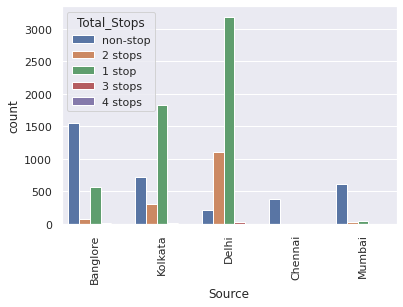

In [434]:
print(flight['Source'].value_counts())
sns.countplot(flight['Source'],hue=flight['Total_Stops'])
plt.xticks(rotation=90)

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

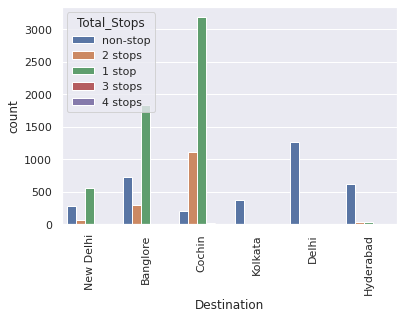

In [435]:
print(flight['Destination'].value_counts())
sns.countplot(flight['Destination'],hue=flight['Total_Stops'])
plt.xticks(rotation=90)

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

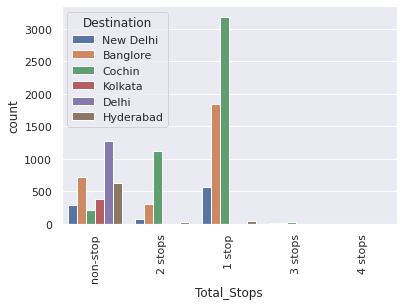

In [436]:
print(flight['Total_Stops'].value_counts())
sns.countplot(flight['Total_Stops'],hue=flight['Destination'])
plt.xticks(rotation=90)

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

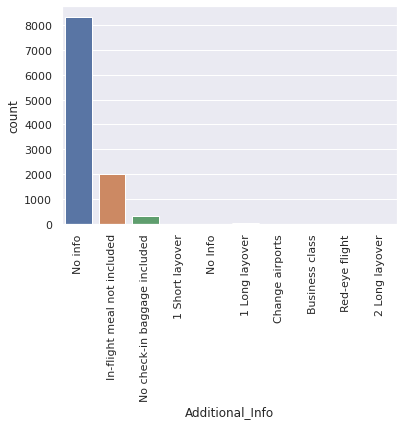

In [437]:
print(flight['Additional_Info'].value_counts())
sns.countplot(flight['Additional_Info'])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


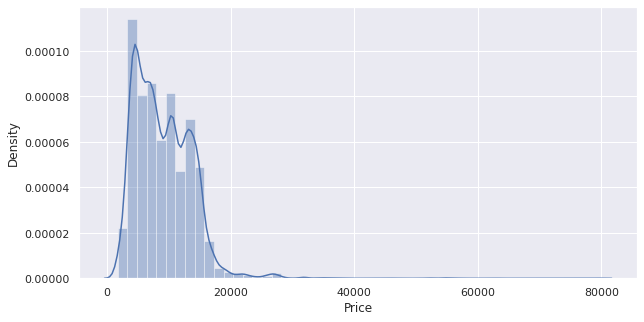

In [438]:
plt.figure(figsize=[10,5])
sns.distplot(flight['Price'])

In [439]:
flight.groupby('Airline')['Price'].max().sort_values()

Airline
Trujet                                4140
Vistara Premium economy              11793
Air Asia                             13774
Multiple carriers Premium economy    14629
Vistara                              21730
IndiGo                               22153
GoAir                                22794
SpiceJet                             23267
Air India                            31945
Multiple carriers                    36983
Jet Airways                          54826
Jet Airways Business                 79512
Name: Price, dtype: int64

In [440]:
flight.groupby('Source')['Price'].max().sort_values()

Source
Chennai     19630
Mumbai      25139
Kolkata     31945
Delhi       52285
Banglore    79512
Name: Price, dtype: int64

In [441]:
flight.groupby('Destination')['Price'].max().sort_values()

Destination
Delhi         8541
Kolkata      19630
Hyderabad    25139
Banglore     31945
Cochin       52285
New Delhi    79512
Name: Price, dtype: int64

In [442]:
flight.groupby('Route')['Price'].max().sort_values()

Route
BOM → NDC → HYD           4140
BLR → STV → DEL           5746
CCU → RPR → HYD → BLR     6103
CCU → BBI → HYD → BLR     6117
CCU → VTZ → BLR           6301
                         ...  
DEL → IDR → BOM → COK    34608
DEL → BOM → COK          36983
DEL → ATQ → BOM → COK    52285
BLR → MAA → DEL          57209
BLR → BOM → DEL          79512
Name: Price, Length: 128, dtype: int64

In [443]:
flight.groupby('Destination')['Price'].min().sort_values()

Destination
Hyderabad    1759
Kolkata      3145
Delhi        3257
New Delhi    3383
Banglore     3480
Cochin       3876
Name: Price, dtype: int64

In [444]:
flight.groupby('Source')['Price'].min().sort_values()

Source
Mumbai      1759
Chennai     3145
Banglore    3257
Kolkata     3480
Delhi       3876
Name: Price, dtype: int64

In [445]:
flight.groupby('Airline')['Price'].min().sort_values()

Airline
SpiceJet                              1759
Jet Airways                           1840
Air India                             2050
IndiGo                                2227
Air Asia                              3383
GoAir                                 3398
Vistara                               3687
Trujet                                4140
Multiple carriers                     5797
Vistara Premium economy               5969
Multiple carriers Premium economy     9845
Jet Airways Business                 46490
Name: Price, dtype: int64

In [446]:
flight['Duration'].agg([min,max])

min      10h
max    9h 5m
Name: Duration, dtype: object

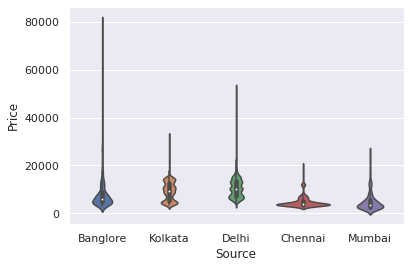

In [447]:
sns.violinplot(x=flight['Source'],y=flight['Price'])

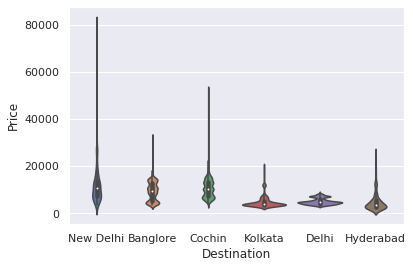

In [448]:
sns.violinplot(x=flight['Destination'],y=flight['Price'])

In [449]:
from datetime import datetime

flight['Date_of_Journey'] = pd.to_datetime(flight['Date_of_Journey'])
flight['Date_of_Journey'] = pd.to_datetime(flight['Date_of_Journey'].dt.strftime('%d-%m-%Y'))

In [450]:
flight.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [451]:
flight['Duration'] = flight['Duration'].apply(lambda x : x.replace('h ',':'))
flight['Duration'] = flight['Duration'].apply(lambda x : x.replace('m',''))
flight['Duration'] = flight['Duration'].apply(lambda x : x.replace('h',':00'))

In [452]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2:50,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19:00,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2:30,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2:35,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3:00,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2:40,non-stop,No info,12648


In [453]:
import re
flight['Arrival_Time'] = flight['Arrival_Time'].apply(lambda x : re.sub('[A-z]','',x))
flight['Arrival_Time'] = flight['Arrival_Time'].apply(lambda x : re.sub('[ ][0-9]{2}','',x)) 

In [454]:
flight.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19:00,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1 stop,No info,13302
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2:25,non-stop,No info,3873
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,15:30,1 stop,In-flight meal not included,11087
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,21:5,1 stop,No info,22270
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,25:30,1 stop,In-flight meal not included,11087
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7:50,1 stop,No info,8625


In [455]:
flight.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)


In [456]:
flight.drop(['Route'],axis=1,inplace=True)

In [457]:
flight.sort_values(by='Price')

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price
4066,SpiceJet,2019-03-21,Mumbai,Hyderabad,1:25,non-stop,No info,1759
10513,SpiceJet,2019-03-27,Mumbai,Hyderabad,1:20,non-stop,No info,1759
4839,SpiceJet,2019-04-03,Mumbai,Hyderabad,1:30,non-stop,No info,1759
4274,SpiceJet,2019-03-27,Mumbai,Hyderabad,1:25,non-stop,No info,1759
1513,Jet Airways,2019-03-27,Mumbai,Hyderabad,1:30,non-stop,In-flight meal not included,1840
...,...,...,...,...,...,...,...,...
1478,Jet Airways,2019-03-18,Banglore,New Delhi,6:5,1 stop,No info,54826
5439,Jet Airways,2019-03-01,Banglore,New Delhi,6:5,1 stop,No info,54826
10364,Jet Airways Business,2019-03-01,Banglore,New Delhi,4:40,1 stop,Business class,57209
5372,Jet Airways Business,2019-03-01,Banglore,New Delhi,6:40,1 stop,Business class,62427


In [458]:
print(flight['Source'].mode()[0] ,flight['Destination'].mode()[0])

Delhi Cochin


In [459]:
flight.drop_duplicates(inplace=True)

In [460]:
print(flight[flight['Total_Stops']=='non-stop'].max())
print(flight[flight['Total_Stops']=='non-stop'].min())
print(flight[flight['Total_Stops']=='1 stop'].max())
print(flight[flight['Total_Stops']=='1 stop'].min())
print(flight[flight['Total_Stops']=='2 stops'].max())
print(flight[flight['Total_Stops']=='2 stops'].min())
print(flight[flight['Total_Stops']=='3 stops'].max())
print(flight[flight['Total_Stops']=='3 stops'].min())
print(flight[flight['Total_Stops']=='4 stops'].max())
print(flight[flight['Total_Stops']=='4 stops'].min())
print(flight.shape)

Airline            Vistara Premium economy
Date_of_Journey        2019-06-27 00:00:00
Source                              Mumbai
Destination                      New Delhi
Duration                              3:50
Total_Stops                       non-stop
Additional_Info             Red-eye flight
Price                                31945
dtype: object
Airline                               Air Asia
Date_of_Journey            2019-03-01 00:00:00
Source                                Banglore
Destination                           Banglore
Duration                                  1:15
Total_Stops                           non-stop
Additional_Info    In-flight meal not included
Price                                     1759
dtype: object
Airline                        Vistara
Date_of_Journey    2019-06-27 00:00:00
Source                          Mumbai
Destination                  New Delhi
Duration                          9:55
Total_Stops                     1 stop
Additional_Info   

In [461]:
#binning
bucket = [0,5000,10000,15000,20000,25000,30000,35000]
labels = ['0-5k','5k-10k','10k-15k','20k-25k','25k-30k','30k-35k','35k and above']

flight['Price_Bracket'] = pd.cut(flight['Price'],bins=bucket,labels=labels)
flight

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Price_Bracket
0,IndiGo,2019-03-24,Banglore,New Delhi,2:50,non-stop,No info,3897,0-5k
1,Air India,2019-05-01,Kolkata,Banglore,7:25,2 stops,No info,7662,5k-10k
2,Jet Airways,2019-06-09,Delhi,Cochin,19:00,2 stops,No info,13882,10k-15k
3,IndiGo,2019-05-12,Kolkata,Banglore,5:25,1 stop,No info,6218,5k-10k
4,IndiGo,2019-03-01,Banglore,New Delhi,4:45,1 stop,No info,13302,10k-15k
...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,2019-05-21,Banglore,Delhi,2:40,non-stop,No check-in baggage included,3257,0-5k
10678,Air Asia,2019-04-09,Kolkata,Banglore,2:30,non-stop,No info,4107,0-5k
10679,Air India,2019-04-27,Kolkata,Banglore,2:35,non-stop,No info,4145,0-5k
10681,Vistara,2019-03-01,Banglore,New Delhi,2:40,non-stop,No info,12648,10k-15k


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

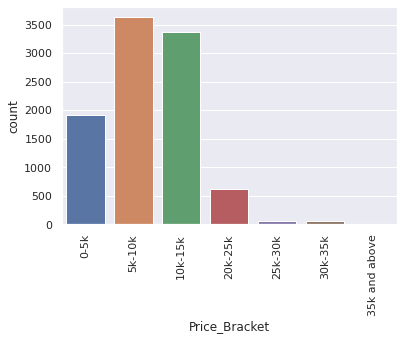

In [462]:
sns.countplot(flight['Price_Bracket'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

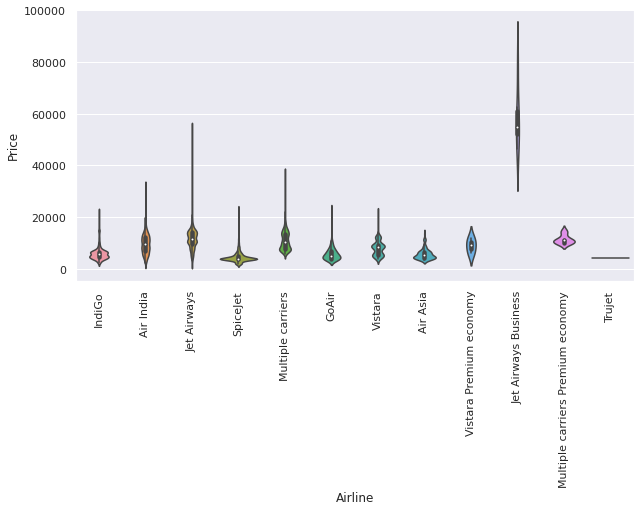

In [463]:
plt.figure(figsize=[10,5])
sns.violinplot(x=flight['Airline'],y=flight['Price'])
plt.xticks(rotation=90)

In [464]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

flight['Airline'] =le.fit_transform(flight['Airline'])
flight['Source'] =le.fit_transform(flight['Source'])
flight['Destination'] =le.fit_transform(flight['Destination'])
flight['Total_Stops'] =le.fit_transform(flight['Total_Stops'])
flight['Additional_Info'] =le.fit_transform(flight['Additional_Info'])

In [465]:
flight

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Price_Bracket
0,3,2019-03-24,0,5,2:50,4,8,3897,0-5k
1,1,2019-05-01,3,0,7:25,1,8,7662,5k-10k
2,4,2019-06-09,2,1,19:00,1,8,13882,10k-15k
3,3,2019-05-12,3,0,5:25,0,8,6218,5k-10k
4,3,2019-03-01,0,5,4:45,0,8,13302,10k-15k
...,...,...,...,...,...,...,...,...,...
10677,8,2019-05-21,0,2,2:40,4,7,3257,0-5k
10678,0,2019-04-09,3,0,2:30,4,8,4107,0-5k
10679,1,2019-04-27,3,0,2:35,4,8,4145,0-5k
10681,10,2019-03-01,0,5,2:40,4,8,12648,10k-15k


In [466]:
#binning
bucket = [0,5000,10000,15000,20000,25000,30000,35000]
labels = ['0-5k','5k-10k','10k-15k','20k-25k','25k-30k','30k-35k','35k and above']

flight['Price_Bracket'] = pd.cut(flight['Price'],bins=bucket,labels=labels)

flight['Price_Bracket'] = le.fit_transform(flight['Price_Bracket'])

flight.drop(['Price'],axis=1,inplace=True)

In [467]:
flight

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price_Bracket
0,3,2019-03-24,0,5,2:50,4,8,0
1,1,2019-05-01,3,0,7:25,1,8,6
2,4,2019-06-09,2,1,19:00,1,8,1
3,3,2019-05-12,3,0,5:25,0,8,6
4,3,2019-03-01,0,5,4:45,0,8,1
...,...,...,...,...,...,...,...,...
10677,8,2019-05-21,0,2,2:40,4,7,0
10678,0,2019-04-09,3,0,2:30,4,8,0
10679,1,2019-04-27,3,0,2:35,4,8,0
10681,10,2019-03-01,0,5,2:40,4,8,1


In [468]:
flight.drop(['Date_of_Journey'],axis=1,inplace=True)

In [469]:
a= ['2:50','14:50','25:30']
for i in a:
  v =i.replace(':','')
  a = int((v[-2:]))
  b = int(v[-4:-2])*60
  print(a+b)

170
890
1530


In [470]:
# flight['Duration'] =flight['Duration'].apply(lambda x : x.replace(':',''))

In [471]:
flight

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price_Bracket
0,3,0,5,2:50,4,8,0
1,1,3,0,7:25,1,8,6
2,4,2,1,19:00,1,8,1
3,3,3,0,5:25,0,8,6
4,3,0,5,4:45,0,8,1
...,...,...,...,...,...,...,...
10677,8,0,2,2:40,4,7,0
10678,0,3,0,2:30,4,8,0
10679,1,3,0,2:35,4,8,0
10681,10,0,5,2:40,4,8,1


In [472]:
# flight[['Dur_Hour','Dur_Minute']] =  flight["Duration"].str.split(":")

In [473]:
# flight['Dur_Hour'] =flight['Dur_Hour'].astype(int)
# flight['Dur_Minute'] = flight['Dur_Hour'].astype(int)

In [474]:
a= ['2:50','14:50','25:30']
for i in a:
  v =i.replace(':','')
  a = int((v[-2:]))
  b = int(v[-4:-2])*60
  print(a+b)

170
890
1530


In [475]:
flight[["Dur_Hour", "Dur_Minute"]] = flight["Duration"].str.split(":", expand=True)
flight['Dur_Hour'] = flight['Dur_Hour'].astype(int)

In [476]:
flight[flight['Dur_Minute'].isnull()==True]
flight['Dur_Minute'].mode()
flight.drop(6474,axis=0,inplace=True)
flight['Dur_Minute'] =flight['Dur_Minute'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


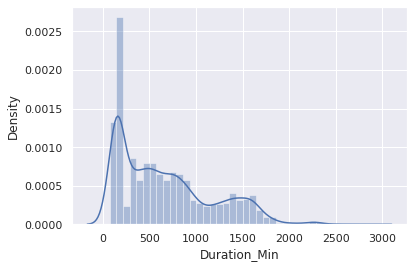

In [477]:
flight['Duration_Min'] = flight['Dur_Hour'] * 60 + flight['Dur_Minute']
flight.drop(['Duration','Dur_Hour','Dur_Minute'],axis=1,inplace=True)
sns.distplot(flight['Duration_Min'])

In [478]:
bins = [0,250,500,750,1000,1250,1500,2000]
labels = ['0m-250m','251m-500m','501m-750m','751m-1000m','1001m-1250m','1251m-1500m','1501m&above']

flight['Dur_Bracket'] = pd.cut(flight['Duration_Min'],bins=bins,labels=labels)


In [479]:
flight['Dur_Bracket'] = le.fit_transform(flight['Dur_Bracket'])

In [480]:
flight

,Airline,Source,Destination,Total_Stops,Additional_Info,Price_Bracket,Duration_Min,Dur_Bracket
0,3,0,5,4,8,0,170,0
1,1,3,0,1,8,6,445,4
2,4,2,1,1,8,1,1140,1
3,3,3,0,0,8,6,325,4
4,3,0,5,0,8,1,285,4
...,...,...,...,...,...,...,...,...
10677,8,0,2,4,7,0,160,0
10678,0,3,0,4,8,0,150,0
10679,1,3,0,4,8,0,155,0
10681,10,0,5,4,8,1,160,0
